In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from wordcloud import WordCloud

In [ ]:
"""
=======GRAPHS BELOW=======
**Text Features**
- title
- location
- description
- requirements
- description_and_requirements
- country_state
- country

**Binary Features**
- telecommuting
- has_company_logo
- has_questions
- fraudulent
- location_has_non_latin
- description_has_non_latin
- requirements_has_non_latin
- has_requirements
- has_location
- has_location_details
"""

'Binary Features:\ntelecommuting\nhas_company_logo\nhas_questions\nfraudulent\nlocation_has_non_latin\ndescription_has_non_latin\nrequirements_has_non_latin\nhas_requirements\nhas_location\nhas_location_details\n\nText Features:\ntitle\nlocation\ndescription\nrequirements\ndescription_and_requirements\ncountry_state\ncountry\n'

In [17]:
df = pd.read_csv("final_data.csv", index_col=0)
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)

# clean data by tokenizing, removing stopwords and punctuation
def preprocess(text):
    if not isinstance(text, str):
        return []
    text = text.lower()
    tokens = word_tokenize(text)
    # remove punctuation and stopwords
    cleaned = [
        t for t in tokens
        if t not in punct and t not in stop_words and t.isalpha()
    ]
    return cleaned

In [18]:
# make preprocessed columns for all text-based columns
df['title_tokens'] = df['title'].apply(preprocess)
df['descr_reqt_tokens'] = df['description_and_requirements'].apply(preprocess)
df['country_state_tokens'] = df['country_state'].apply(preprocess)

# cols is list of all text-based columns
cols = ['title_tokens', 'descr_reqt_tokens','country_state_tokens']

In [19]:
# note that each entries is broken down into tokens
df[cols].head()

title_tokens  \
0                            [marketing, intern]   
1  [customer, service, cloud, video, production]   
2     [commissioning, machinery, assistant, cma]   
3           [account, executive, washington, dc]   
4                        [bill, review, manager]   

                                   descr_reqt_tokens country_state_tokens  
0  [james, beard, online, food, community, curate...             [us, ny]  
1  [organised, focused, vibrant, awesome, passion...                 [nz]  
2  [client, located, houston, actively, seeking, ...             [us, ia]  
3  [company, esri, environmental, systems, resear...             [us, dc]  
4  [job, title, itemization, review, managerlocat...             [us, fl]

In [ ]:
############################
##### Plot Text Columns ####
############################

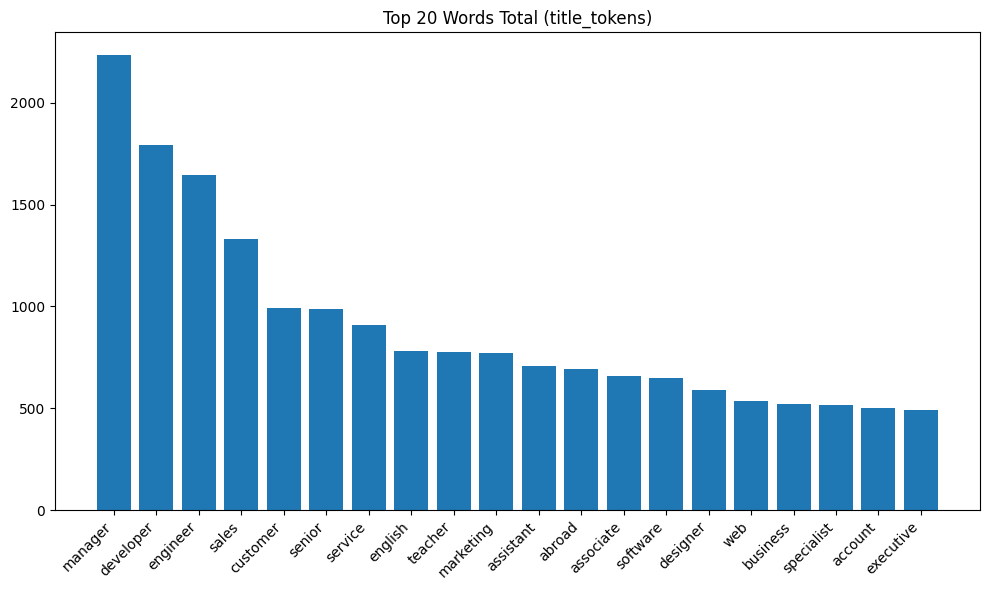

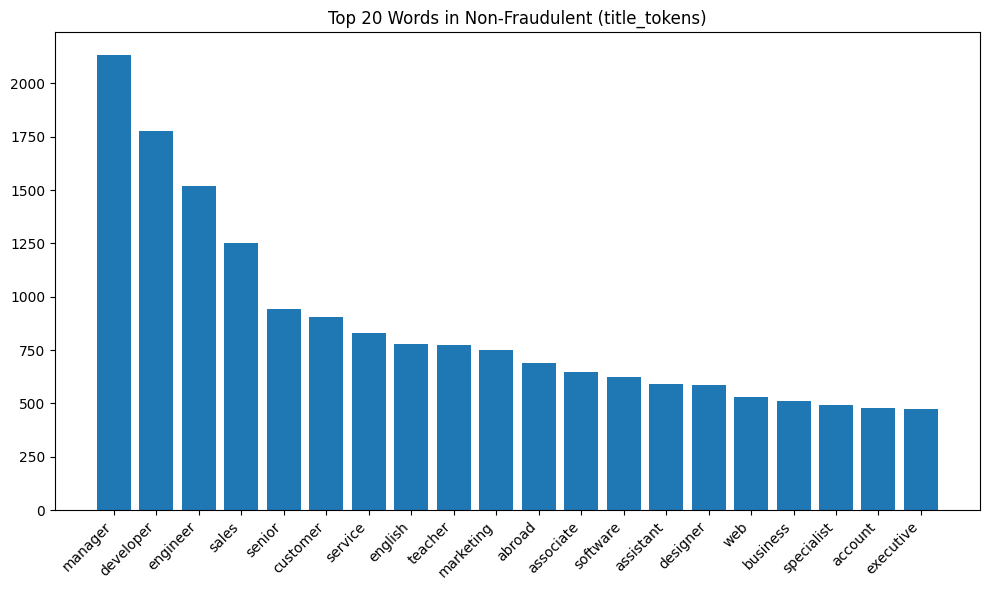

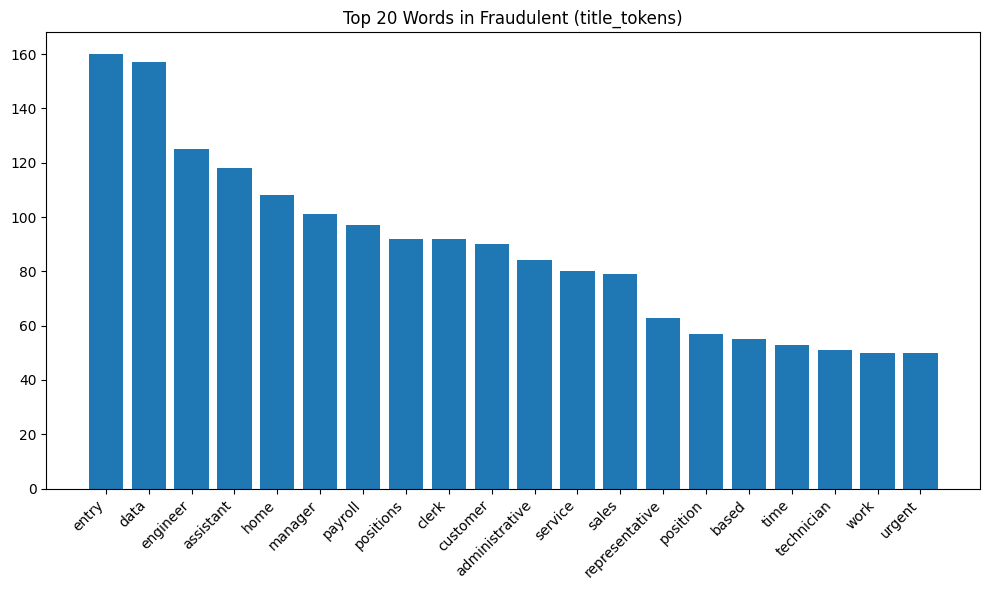

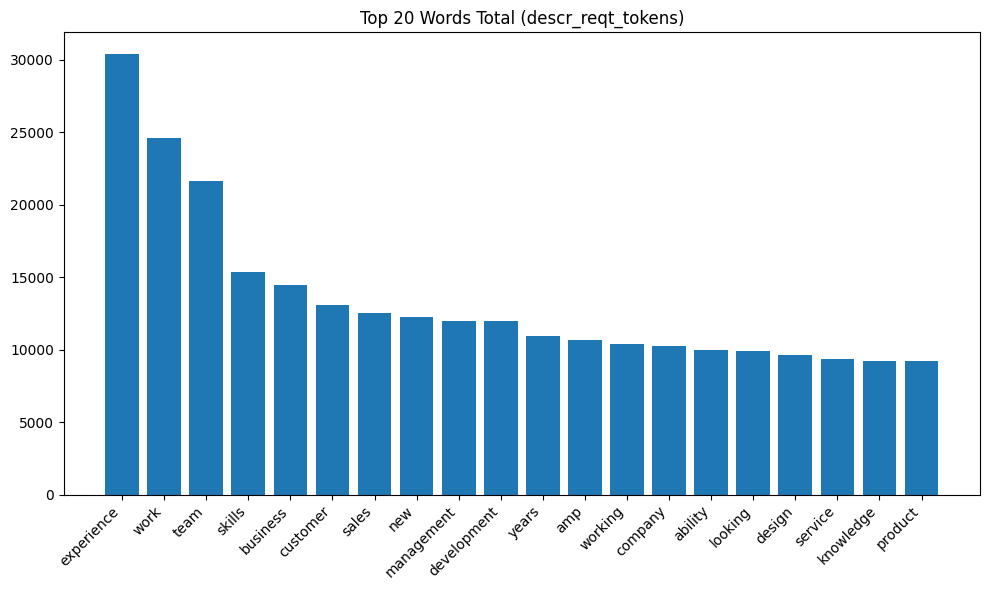

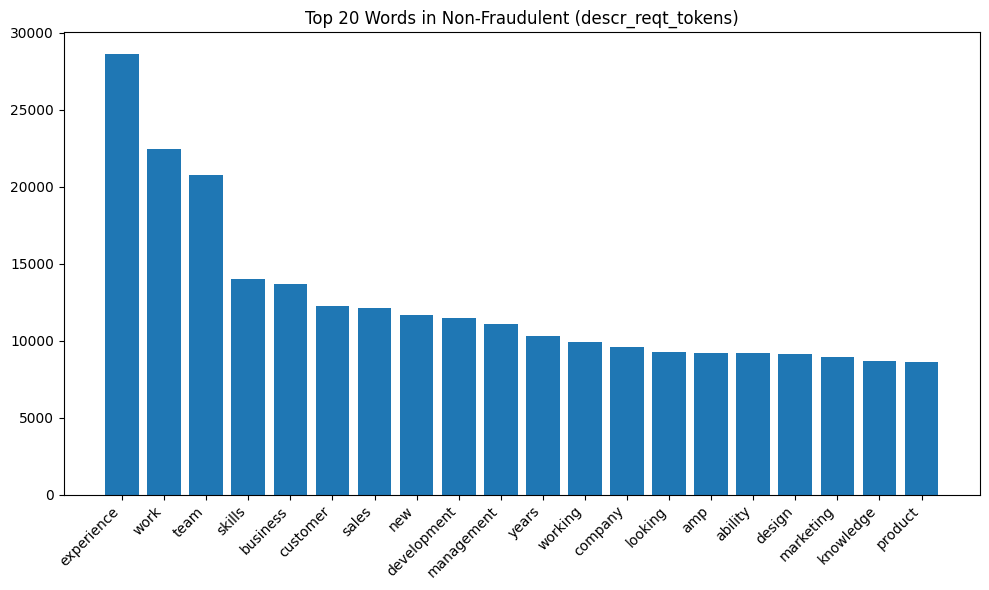

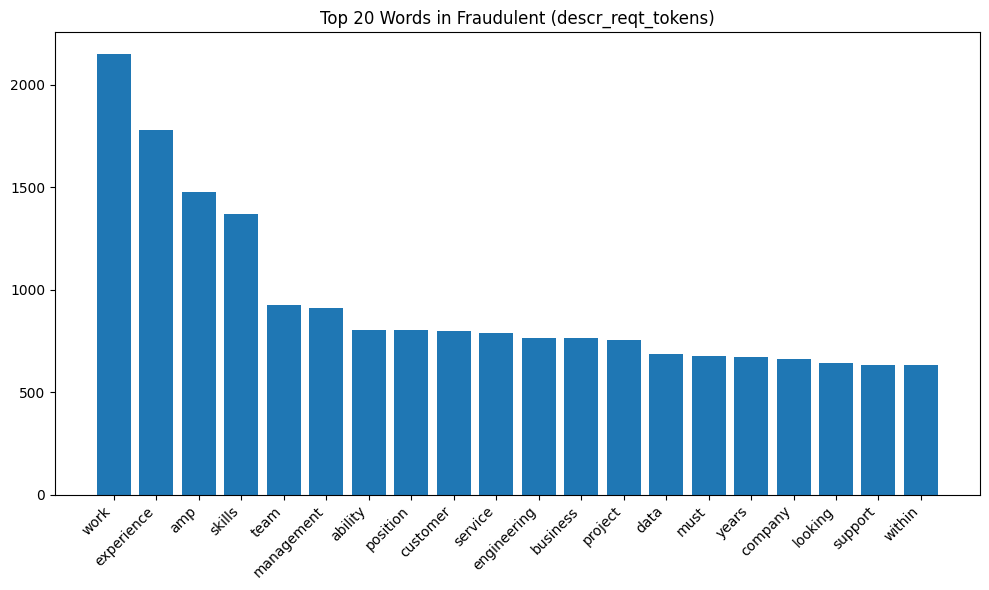

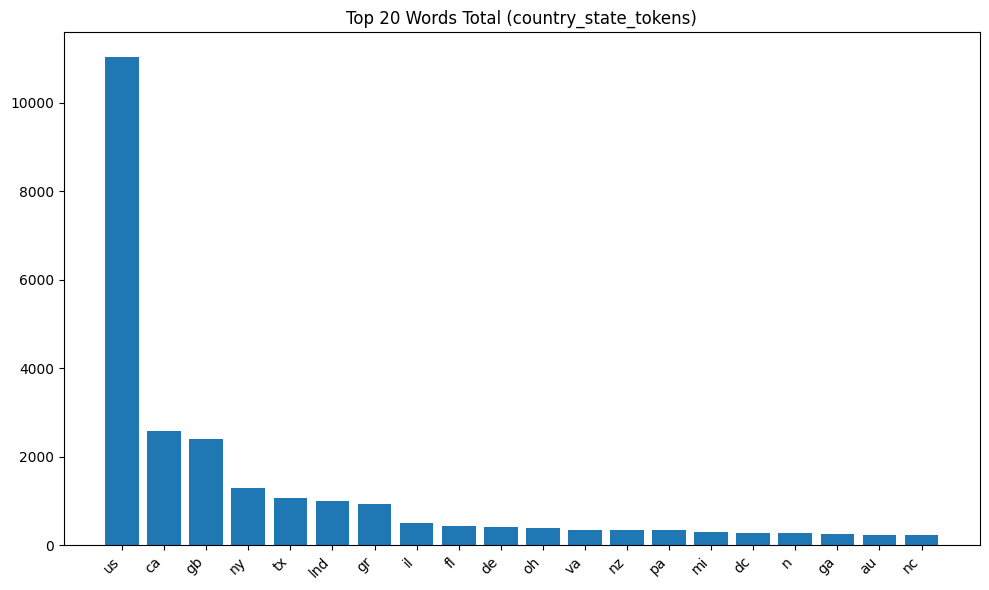

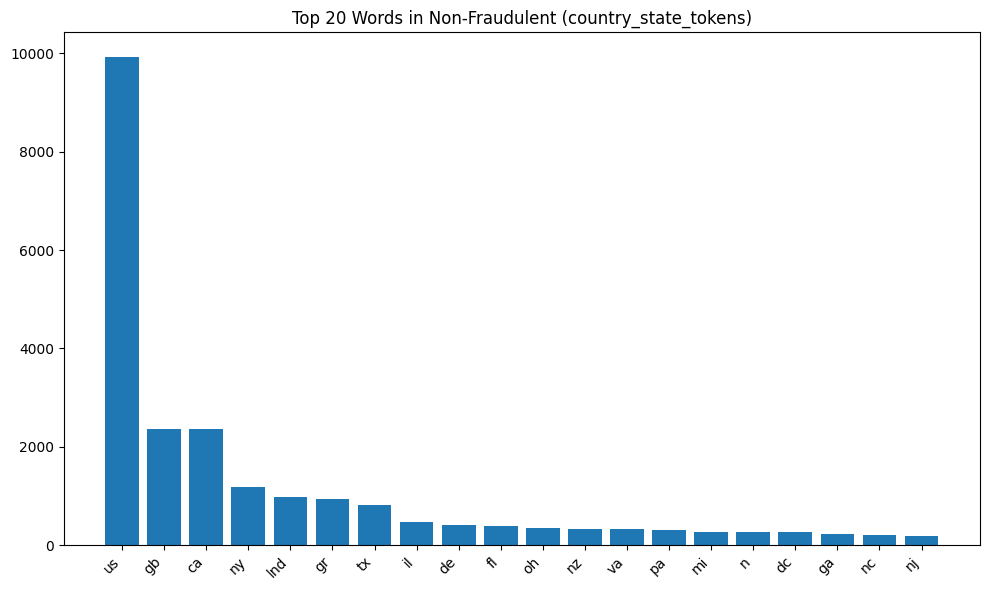

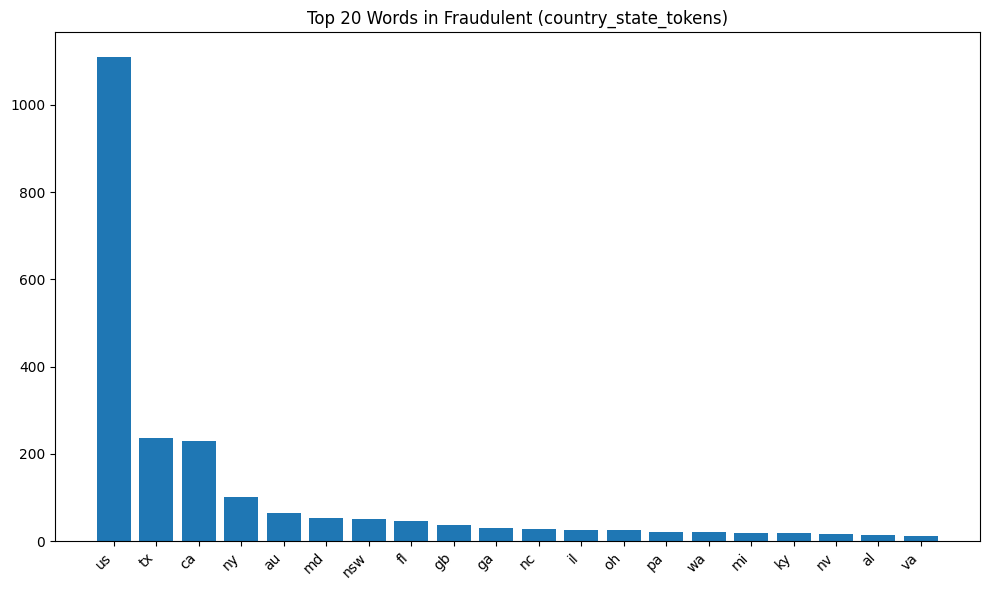

In [22]:
def plot_top_words(df_subset, token_col, title):
    """
    Plots the top 20 words of text-based column based on frequency
    df_subset: column you want to plot
    token_col: tokenized column
    title: title of plot 
    """
    all_tokens = [t for tokens in df_subset[token_col] for t in tokens]
    freq = Counter(all_tokens).most_common(20)
    freq_df = pd.DataFrame(freq, columns=['word', 'count'])

    plt.figure(figsize=(10, 6))
    plt.bar(freq_df['word'], freq_df['count'])
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_for_columns(df, columns):
    """
    columns: list of column names whose tokenized versions you want to analyze.
    Assumes each column already contains token lists (preprocessed).
    """
    for col in columns:
        subset_non = df[df['fraudulent'] == 0]
        subset_fraud = df[df['fraudulent'] == 1]
        plot_top_words(
            df,
            col,
            f"Top 20 Words Total ({col})"
        )
        plot_top_words(
            subset_non,
            col,
            f"Top 20 Words in Non-Fraudulent ({col})"
        )
        plot_top_words(
            subset_fraud,
            col,
            f"Top 20 Words in Fraudulent ({col})"
        )

plot_for_columns(df, cols)

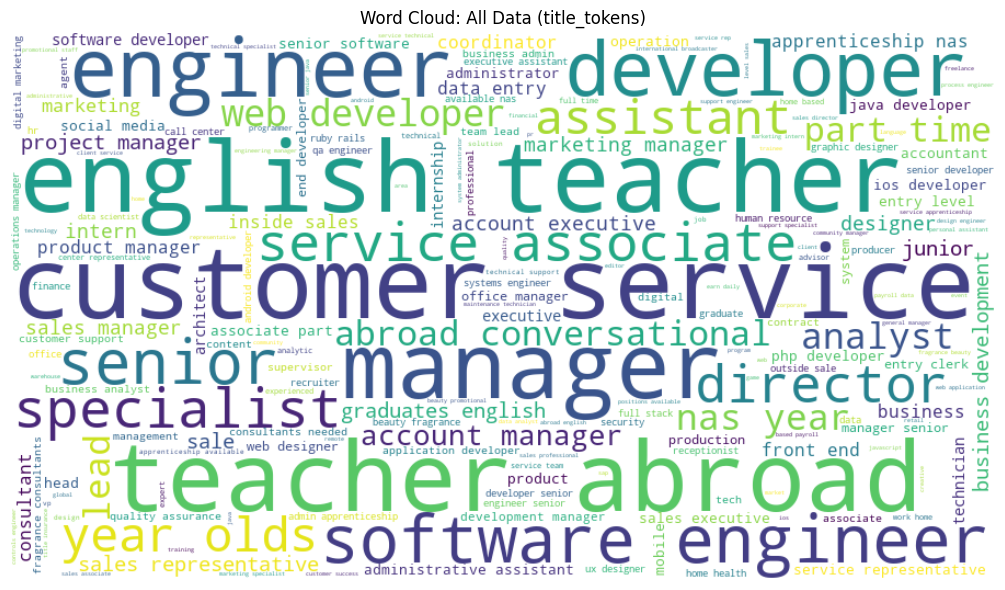

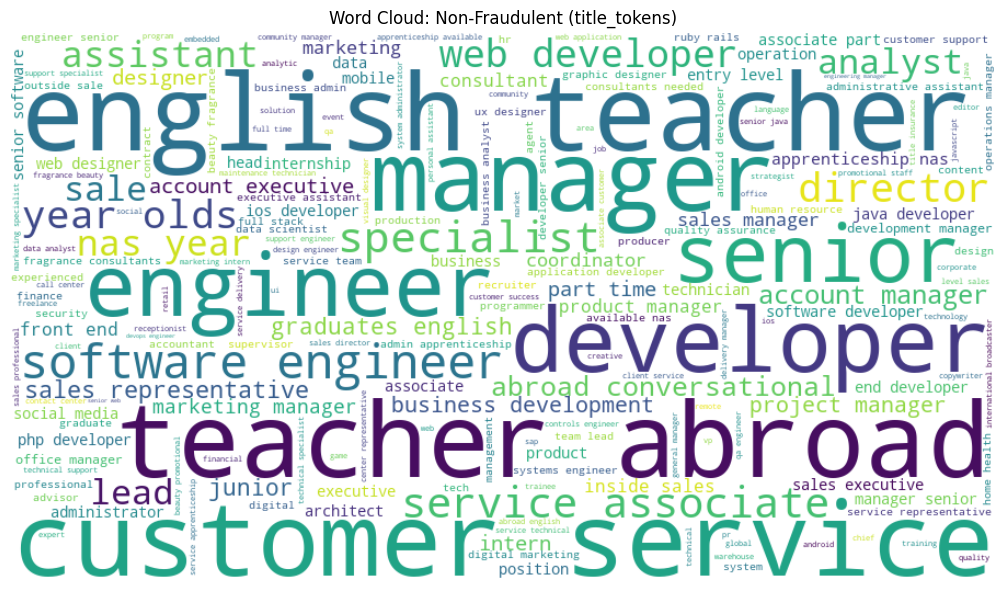

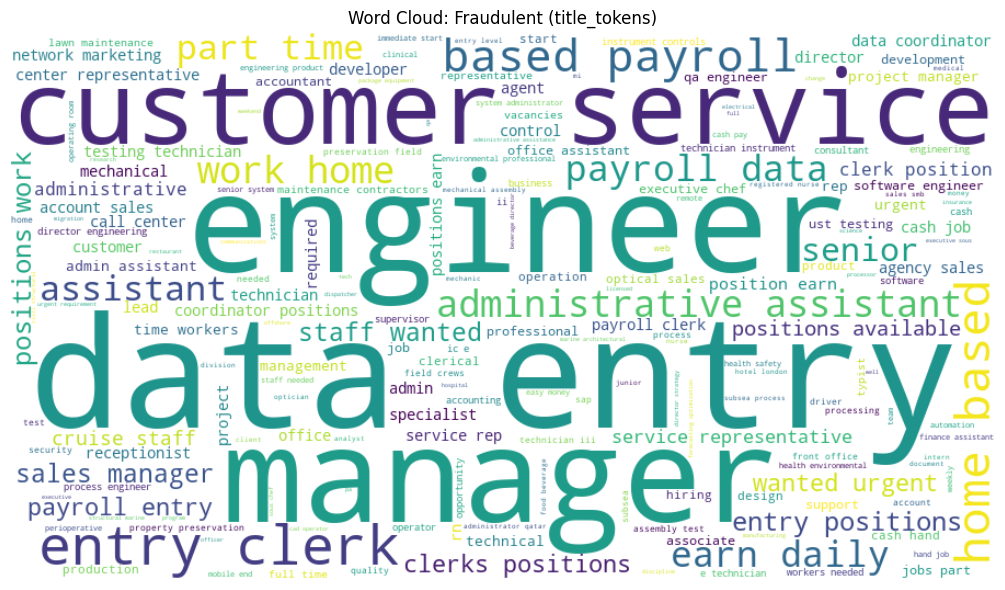

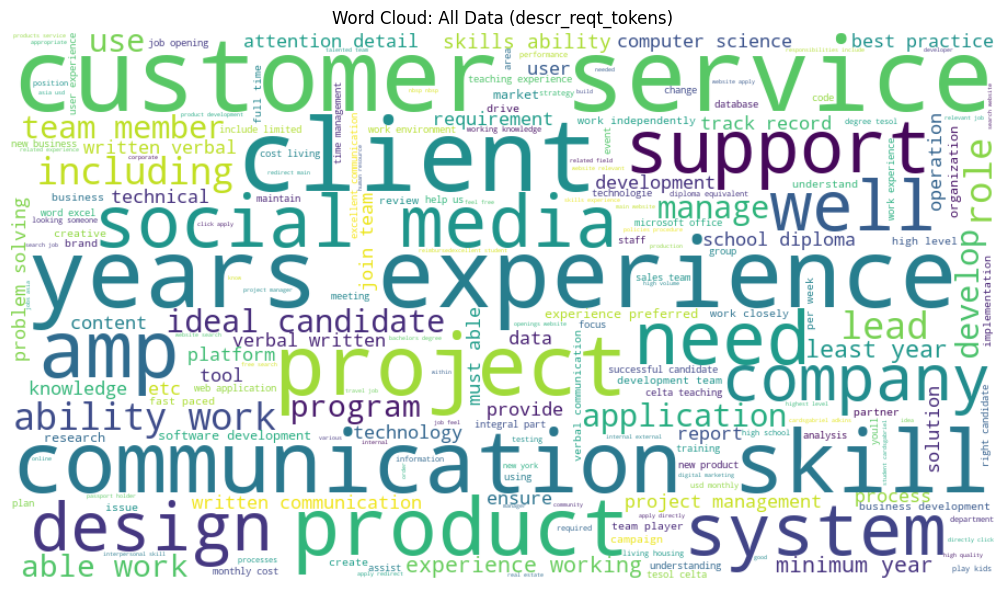

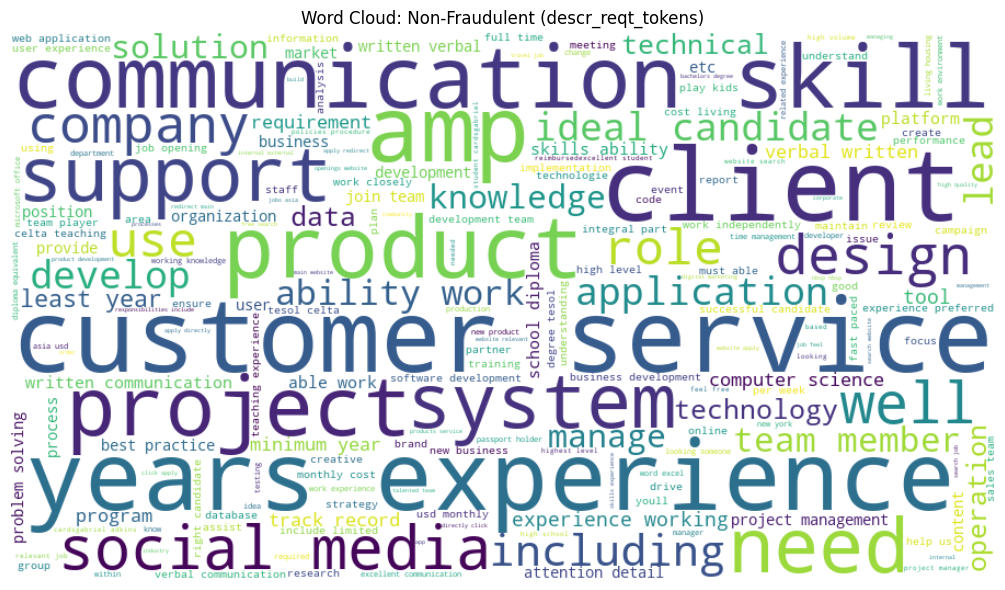

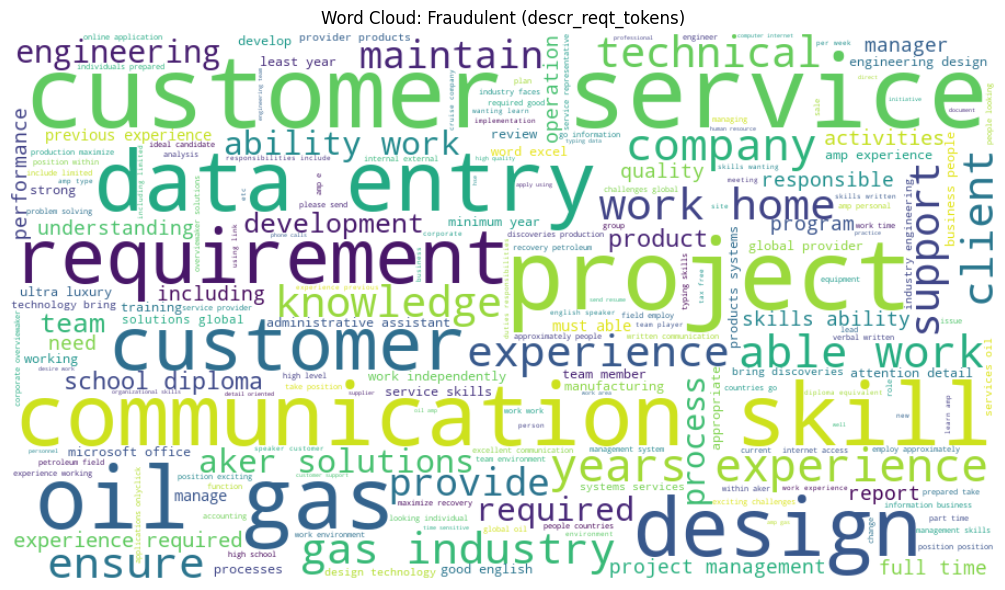

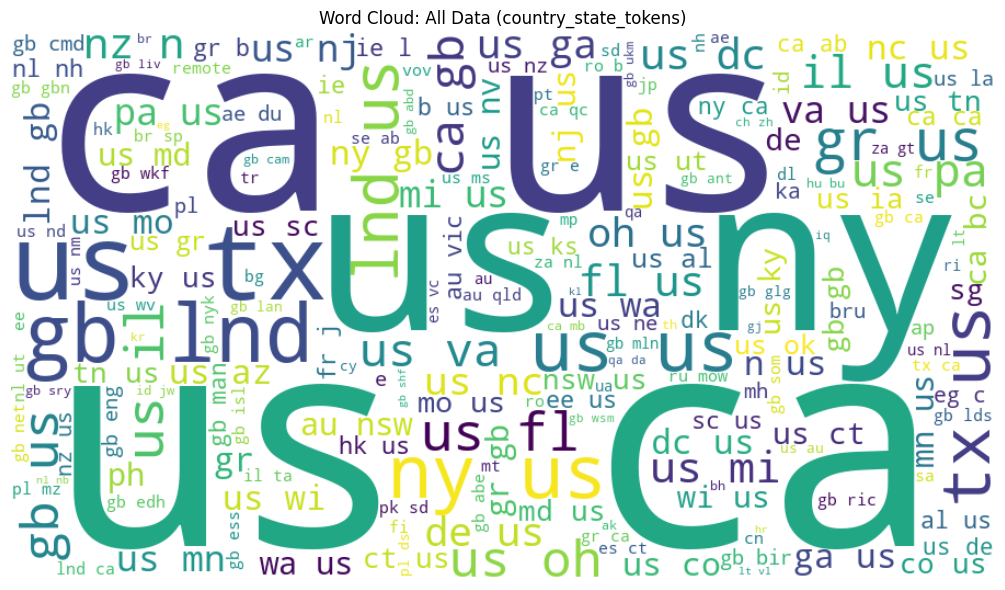

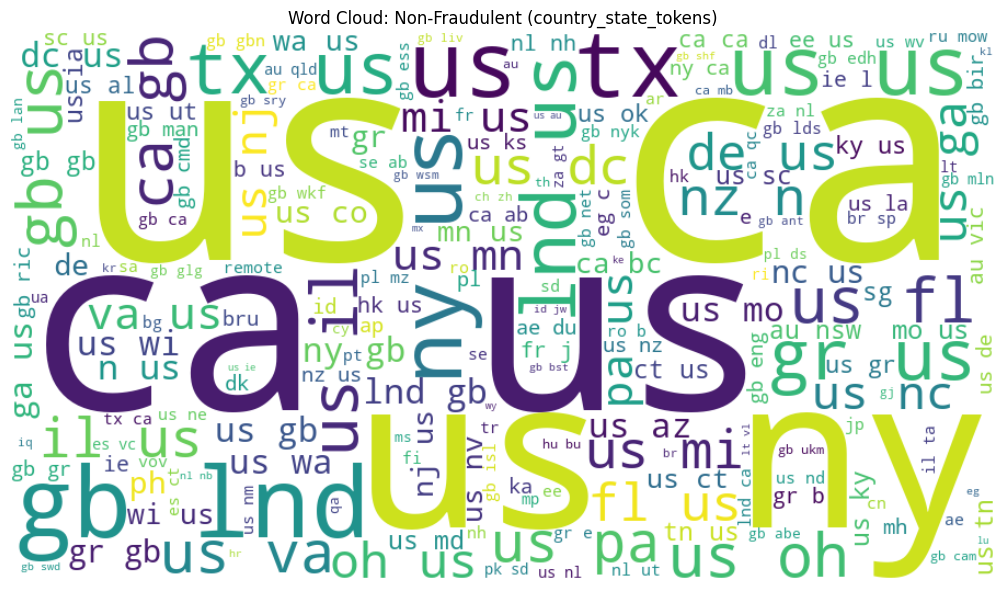

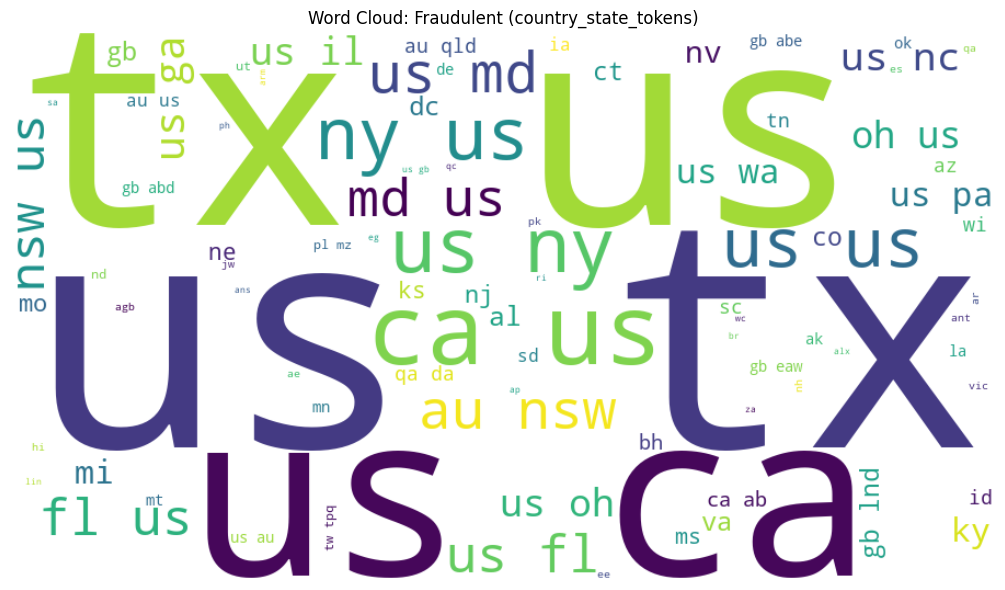

In [23]:
# function to plot word cloud for column
def plot_wordcloud(df_subset, token_col, title):
    # Flatten all tokens into one list
    all_tokens = [t for tokens in df_subset[token_col] for t in tokens]
    text = " ".join(all_tokens)

    wc = WordCloud(
        width=900,
        height=500,
        background_color="white"
    ).generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# loop through each text-based column and generate word cloud
for col in cols:
    plot_wordcloud(
        df,
        token_col=col,
        title=f"Word Cloud: All Data ({col})"
    )

    plot_wordcloud(
        df[df['fraudulent'] == 0],
        token_col=col,
        title=f"Word Cloud: Non-Fraudulent ({col})"
    )

    plot_wordcloud(
        df[df['fraudulent'] == 1],
        token_col=col,
        title=f"Word Cloud: Fraudulent ({col})"
    )

In [ ]:
############################
### Plot Binary Features ###
############################

telecommuting dtype: int64
telecommuting
0    17529
1      805
Name: count, dtype: int64
----------------------------------------
has_company_logo dtype: int64
has_company_logo
1    14378
0     3956
Name: count, dtype: int64
----------------------------------------
has_questions dtype: int64
has_questions
0    9417
1    8917
Name: count, dtype: int64
----------------------------------------
fraudulent dtype: int64
fraudulent
0    17014
1     1320
Name: count, dtype: int64
----------------------------------------
location_has_non_latin dtype: int64
location_has_non_latin
0    18232
1      102
Name: count, dtype: int64
----------------------------------------
description_has_non_latin dtype: int64
description_has_non_latin
1    14223
0     4111
Name: count, dtype: int64
----------------------------------------
requirements_has_non_latin dtype: int64
requirements_has_non_latin
1    9874
0    8460
Name: count, dtype: int64
----------------------------------------
has_requirements dtype: bo

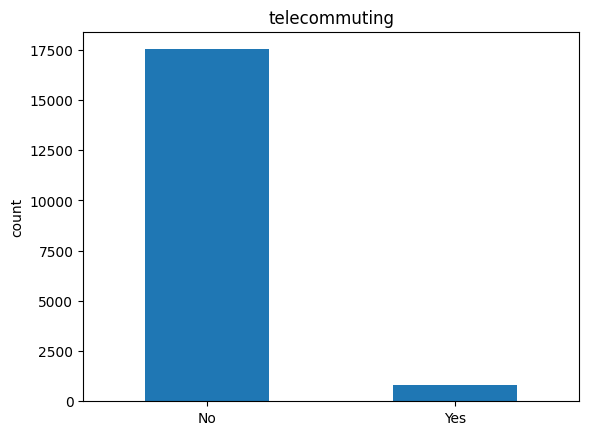

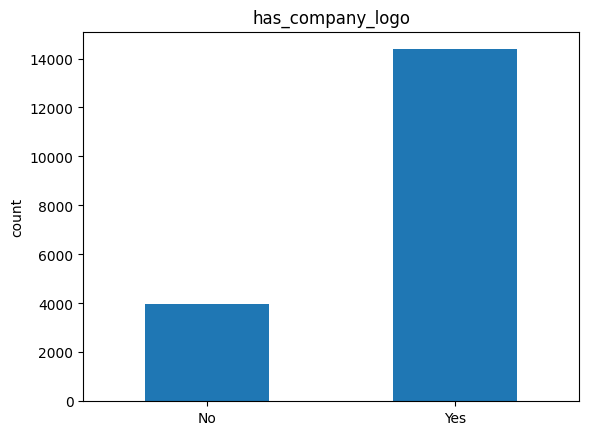

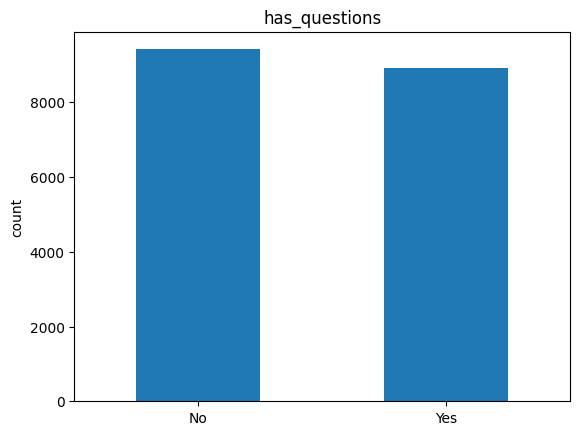

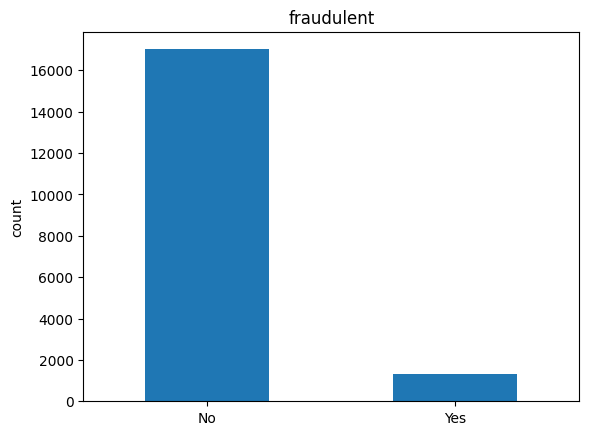

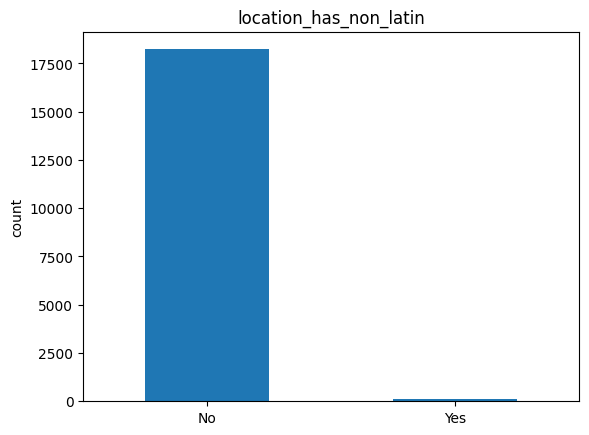

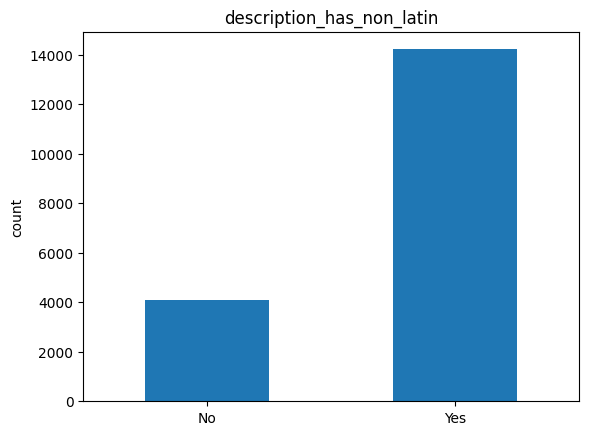

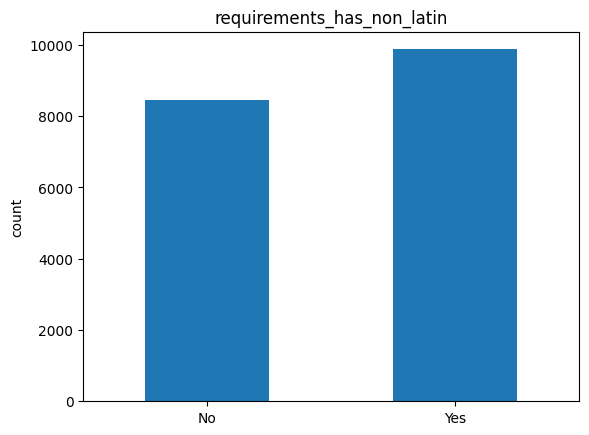

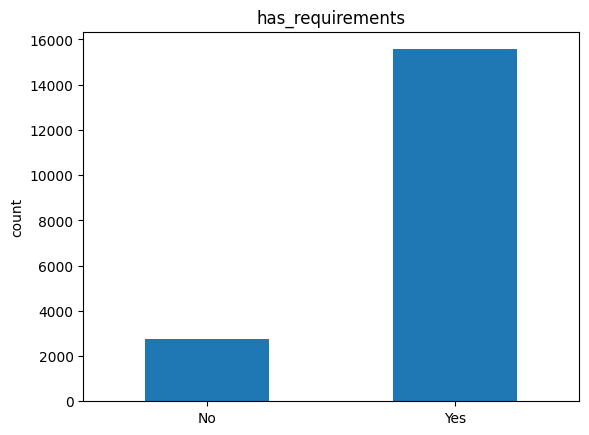

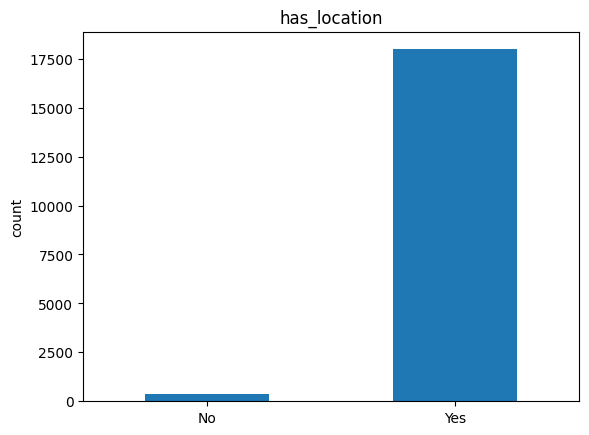

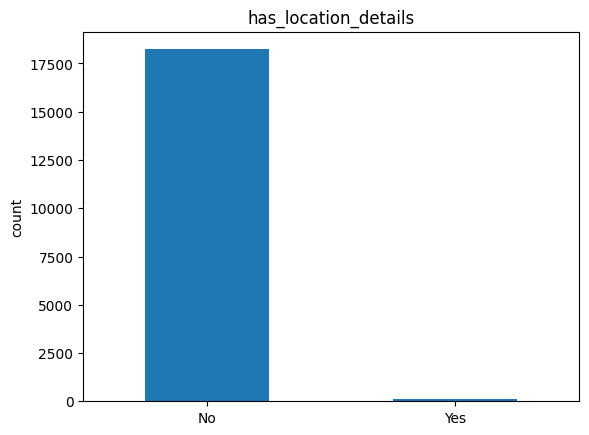

In [ ]:
binary_cols = [
    "telecommuting",
    "has_company_logo",
    "has_questions",
    "fraudulent",
    "location_has_non_latin",
    "description_has_non_latin",
    "requirements_has_non_latin",
    "has_requirements",
    "has_location",
    "has_location_details"
]

# print value counts for each category
for c in binary_cols:
    print(c, "dtype:", df[c].dtype)
    print(df[c].value_counts(dropna=False))
    print("-" * 40)

# rename x labels to No and Yes for 0 and 1
rename_map = {0: "No", 1: "Yes"}

# loop to plot binary graphs
for c in binary_cols:
    counts = df[c].value_counts().sort_index()
    if set(counts.index).issubset({0, 1}):
        counts = counts.rename(index=rename_map)

    plt.figure() 
    counts.plot(kind="bar")
    plt.xlabel("")
    plt.ylabel("count")
    plt.title(c)
    plt.xticks(rotation=0)
    plt.show()
